In [1]:
import sys
sys.path.append("../") 

from settings import FILE_DATA_EXEMPLE

import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(495, 863, 3)


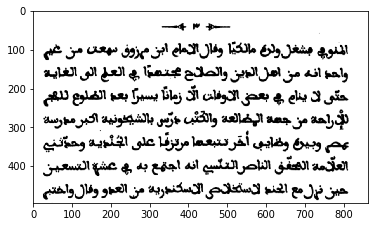

In [2]:
image = cv2.imread(FILE_DATA_EXEMPLE)
h,w = image.shape[:2]
print(image.shape)
plt.imshow(image,cmap='gray')
plt.show()

(495, 863)


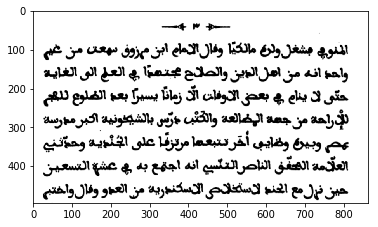

In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
h,w = gray.shape[:2]
print(gray.shape)
plt.imshow(gray,cmap='gray')
plt.show()

In [9]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

In [11]:
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2.imshow('dilated',img_dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]

    # show ROI
    cv2.imshow('segment no:'+str(i),roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
cv2.imshow('marked areas',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# cv2.imshow('orig',image)
# cv2.waitKey(0)


# #grayscale
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray',gray)
# cv2.waitKey(0)
#
# #binary
# ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
# cv2.imshow('second',thresh)
# cv2.waitKey(0)
#
# #dilation
# kernel = np.ones((5,5), np.uint8)
# img_dilation = cv2.dilate(thresh, kernel, iterations=1)
# cv2.imshow('dilated',img_dilation)
# cv2.waitKey(0)
#
# #find contours
# im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#
# #sort contours
# sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
#
# for i, ctr in enumerate(sorted_ctrs):
#     # Get bounding box
#     x, y, w, h = cv2.boundingRect(ctr)
#
#     # Getting ROI
#     roi = image[y:y+h, x:x+w]
#
#     # show ROI
#     cv2.imshow('segment no:'+str(i),roi)
#     cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
#     cv2.waitKey(0)
#
# cv2.imshow('marked areas',image)
# cv2.waitKey(0)
